C:\Users\Diego\AppData\Local\Temp\ipykernel_8940\2839391758.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  tri /= np.trapz(tri, z)  # normalizar para que el área sea 1
C:\Users\Diego\AppData\Local\Temp\ipykernel_8940\2839391758.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  gauss /= np.trapz(gauss, z)
C:\Users\Diego\AppData\Local\Temp\ipykernel_8940\2839391758.py:26: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  epan /= np.trapz(epan, z)


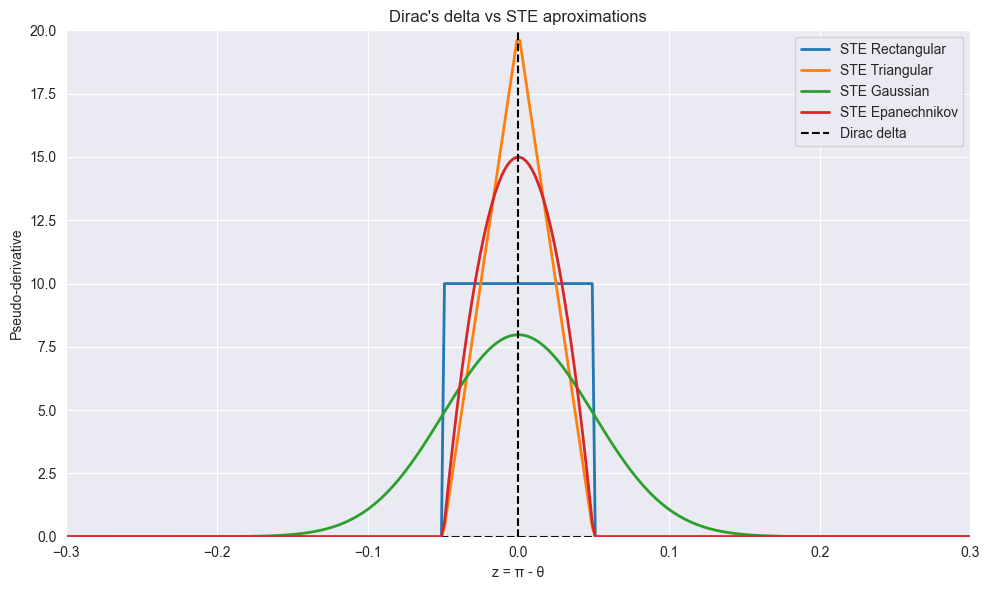

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Eje z (diferencia z = pi - theta)
z = np.linspace(-1, 1, 1000)
epsilon = 0.1

# Delta de Dirac ideal (no es representable, así que una aproximación)
delta_approx = np.zeros_like(z)
delta_approx[np.abs(z) < 1e-3] = 1e3  # pico muy estrecho y alto

# Rectángulo
rect = (np.abs(z) < (epsilon / 2)).astype(float) / epsilon

# Triangular
tri = (1 - np.abs(z / (epsilon / 2))) * (np.abs(z) < (epsilon / 2))
tri /= np.trapz(tri, z)  # normalizar para que el área sea 1

# Gaussiano
gauss = norm.pdf(z, loc=0, scale=epsilon / 2)
gauss /= np.trapz(gauss, z)

# Epanechnikov
epan = 0.75 * (1 - (z / (epsilon / 2))**2) * (np.abs(z) < (epsilon / 2))
epan /= np.trapz(epan, z)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(z, delta_approx, linestyle="--", color="black")
plt.plot(z, rect, label="STE Rectangular", linewidth=2)
plt.plot(z, tri, label="STE Triangular", linewidth=2)
plt.plot(z, gauss, label="STE Gaussian", linewidth=2)
plt.plot(z, epan, label="STE Epanechnikov", linewidth=2)
plt.ylim(0, 20)
plt.plot([0, 0], [0, 20], 'k--', label='Dirac delta')

plt.title("Dirac's delta vs STE aproximations")
plt.xlabel("z = π - θ")
plt.ylabel("Pseudo-derivative")
plt.legend()
plt.xlim(-0.3, 0.3)
plt.grid(True)
plt.tight_layout()
plt.show()
